# <center>Lab Excersice 5:  Exploratory data analysis (EDA). Data cleaning and preparation
<center>Humberto Díaz <br>
The University of Winnipeg <br>
DIT 54102 AIW01: Foundations of Data Science <br>
Muhammad Shahin PhD. <br>
May 4, 2025 <br>

#### Learning Objectives
* Univariate, bivariate, and multivariate analysis
* Data cleaning
* Data preparation

### Loading Data

In [1]:
# Import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the data set of "Marketing Analysis" in data.
marketing_data = pd.read_csv("/Users/eleazar/Documents/Projects/lab5/dataset/marketing_analysis.csv")
# Print the data
marketing_data

/var/folders/dk/g6kdw5nj5hb8tlfg5r6rfn300000gn/T/ipykernel_29408/2134428007.py:2: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  marketing_data = pd.read_csv("/Users/eleazar/Documents/Projects/lab5/dataset/marketing_analysis.csv")


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [3]:
# Read the file in data without first two rows as it is of no use.
marketing_data = pd.read_csv("/Users/eleazar/Documents/Projects/lab5/dataset/marketing_analysis.csv", skiprows=2)
marketing_data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


## Data Cleaning

In [4]:
# Drop the customer id as it is of no use
marketing_data.drop('customerid', axis=1, inplace=True)

In [5]:
marketing_data.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [6]:
#Extract job & Education in newly from "jobedu" column.
marketing_data['job']= marketing_data["jobedu"].apply(lambda x: x.split(",")[0])
marketing_data['education']= marketing_data["jobedu"].apply(lambda x: x.split(",")[1])

In [7]:
# Drop the "jobedu" column from the dataframe.
marketing_data.drop('jobedu', axis = 1, inplace = True)

In [8]:
# Print the Dataset
marketing_data

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [9]:
# Check the missing values
marketing_data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [10]:
#Dropping the records with age missing values in dataframe
marketing_data = marketing_data[~marketing_data.age.isnull()].copy()

#checking the missing values in the dataset
marketing_data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [11]:
#Find the mode of month in data
month_mode = marketing_data.month.mode()[0]

In [12]:
#Fill the missing values with mode value of month in data
marketing_data.month.fillna(month_mode, inplace=True)

/var/folders/dk/g6kdw5nj5hb8tlfg5r6rfn300000gn/T/ipykernel_29408/1234449627.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marketing_data.month.fillna(month_mode, inplace=True)


In [13]:
#Let's see the null values in the month column
marketing_data.month.isnull().sum()

np.int64(0)

#### Question 1: Implement three alternative approaches to handle missing values in the age or month columns. Explain why you decide to implement these approaches

In [14]:
#Drop missing values in our target columnm, Respons column.
marketing_data = marketing_data[~marketing_data.response.isnull()].copy()

In [15]:
#Calculate the missing vlaues in each coleumnd of the dataframe
marketing_data.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

#### Question 2: Is there outliers in our dataset (look for them)? If yes, implement approach to hanlde them. If no, demonstrate how you made this conclusion

### Univariety Analysis

Categorical Unordered Analysis:

In [16]:
#Let's calculate the percentage of each job status category
marketing_data.job.value_counts(normalize=True)

job
blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: proportion, dtype: float64

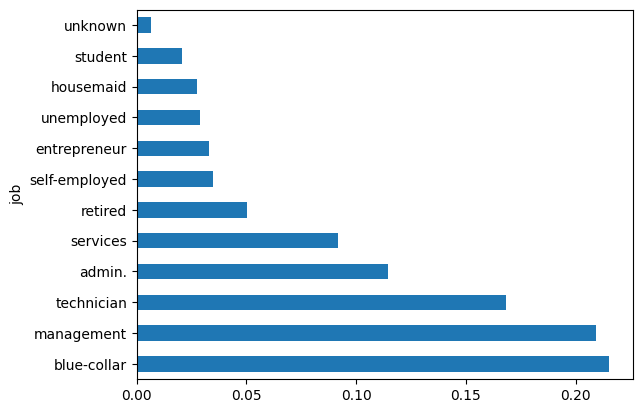

In [17]:
#Plot the bar graph og percentage job categories
marketing_data.job.value_counts(normalize=True).plot.barh()
plt.show()

#### Question 3: Add titles and data labels to this plot

We can infer that the dataset contains more numer of clue-collat coworkers compared to other categorie.

#### Question 4: Are there 'unknown' values in the dataset? Should we consider them missing? Explain how would you handle them, and demonstrate your solution. If yoy decide to leave them as they are, explain why you made this decision.

### Categorical Ordered Univariete Anaylis

In [18]:
#Calculate the precentage of each education category
marketing_data.education.value_counts(normalize=True)

education
secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: proportion, dtype: float64

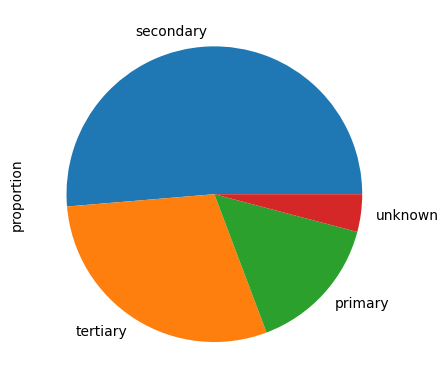

In [19]:
#Plot the pie chart of education categories
marketing_data.education.value_counts(normalize=True).plot.pie()
plt.show()

#### Question 5: Add titles and data labels to this plot

If the column or variable is ogf numerical then we'll analyze by calculating its mean, median, std, etc. Wr can get those calues ny using the ``describe()`` function.

In [20]:
#Apply describe() function to a salary varaible
marketing_data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

#### Question 6: Perform describe on all numerical columns in the dataset and comment on three most interesting observations

## Bivariate Analysis

#### Numeric-Numeric Analysis

We can analyze two numeric variables from a dataset in three different ways:
* Scatter Plot
* Pie Plot
* Correlation Matrix

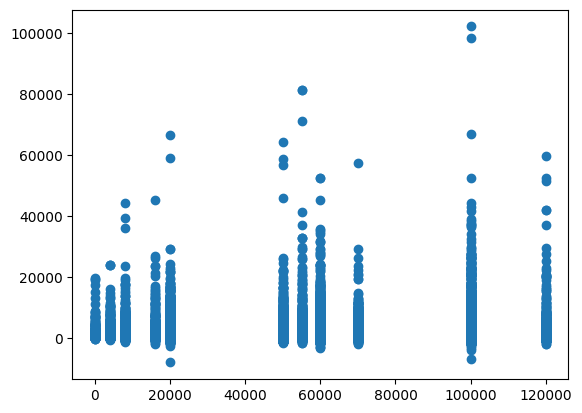

In [21]:
#Plot the scatter plot of balance and salary variable in de data
plt.scatter(marketing_data.salary, marketing_data.balance)
plt.show()

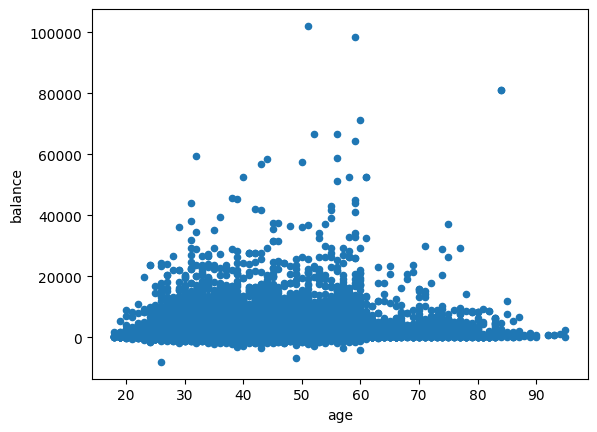

In [22]:
#Plot the scatter plot of balace and age variables in data
marketing_data.plot.scatter(x='age', y='balance')
plt.show()

#### Question 7: Add plots formatting-axis titles and change dots formatting (color, size, transparency) so it is easier to observe data patterns

Plot Pair Plots for the three columns we used in plotting Scatter plots. We'll use the seaborn library for plotting Pair Plots

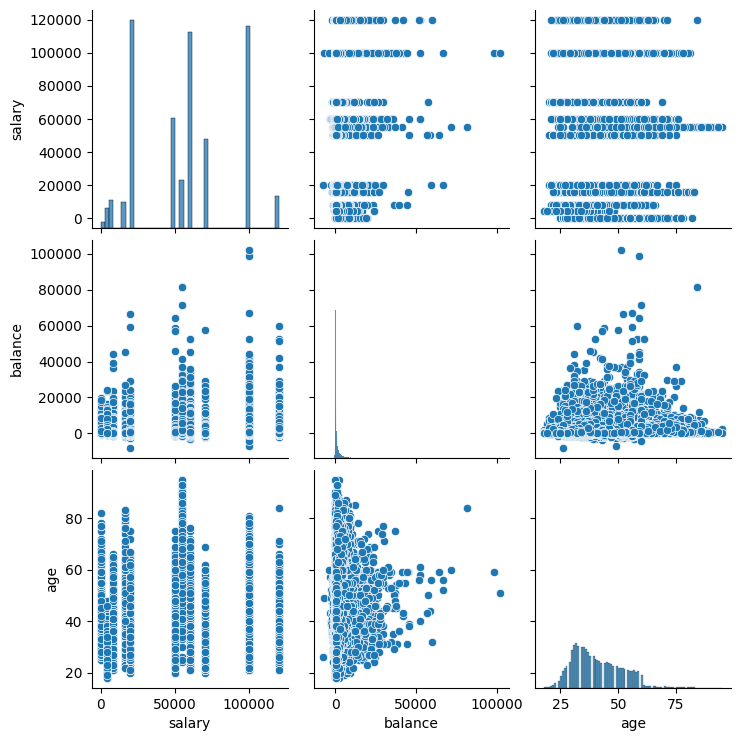

In [23]:
#plot the pair plot of salary, balance, and age in data dataframe
sns.pairplot(data = marketing_data, vars=['salary', 'balance', 'age'])
plt.show()

We will use the correlation matrix for visualiation's sake. First we createa matrix using age, salary, and balance. Then, we are plottingthe heatmap usinf seaborn libray of the matrix.

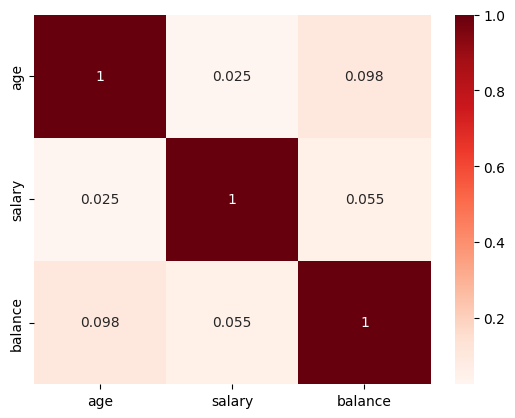

In [24]:
#Creating a matrix using age, salary, balance as rows and columns
marketing_data[['age', 'salary', 'balance']].corr()

#Plot the correaltion matrix of salary, balance, and age in dataframe
sns.heatmap(marketing_data[['age', 'salary', 'balance']].corr(),
            annot=True,
            cmap = 'Reds')
plt.show()

### Numeric - Categorical Analysis
Here, we will analyze one numeric variable and one categorical value. We do it mainly using mean, median and boxplots. Let's take salary response columns; first check for mean value using ``groupby``.

In [25]:
#groupby the response to find the mean of the salary with response no & yes separetely
marketing_data.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

Not much difference. Lets' calculate the median

In [26]:
#groupby the response to find the median of the salary with response no & yes separetely
marketing_data.groupby('response')['salary'].median()


response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

For visualization's sake, let's plot the box plot for them and check behavior

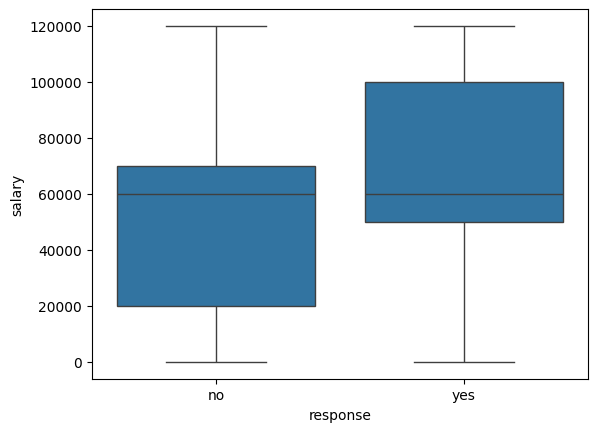

In [30]:
#Plot the box plot of slalary for yes & no responses
sns.boxplot(x=marketing_data.response, y=marketing_data.salary)
plt.show()

#### Question 8: Seaborn library has variety of visualizations alternative to box plots aimign to analyze data distribution. Implement violin plots instead of box plots to look at the salary by response variable. Change colors on the plot usin one of the seaborn palettes

### Categorical - Categorical Analysis
We will see how different categories like Education, Marital Status, etc., are associated with the Response column. So instead of 'Yes' and 'No' we will convert them into '1', and '0', by doing tha we will get the 'Response Rate'.


In [32]:
#Create response rate of categorical data type where response 'yes'=1, 'no'=0

marketing_data['response_rate'] = np.where(marketing_data.response=='yes', 0,1)
marketing_data.response_rate.value_counts()

response_rate
1    39876
0     5285
Name: count, dtype: int64

Lets' see how the response rate varies for different categories in marital status.

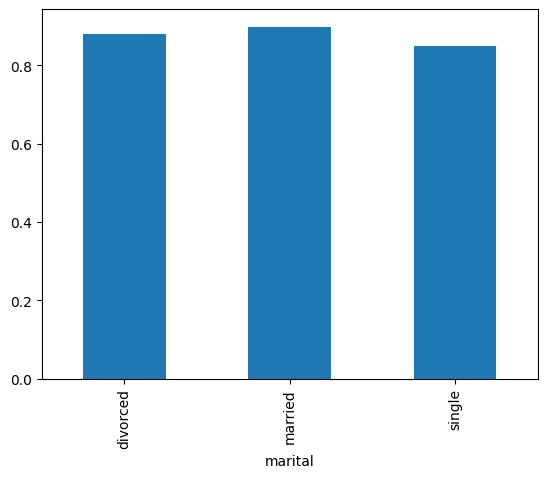

In [35]:
#Plot the bar graph of marital status with average value of response rate
marketing_data.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()                       

#### Question 9: Add data labels and y-axis title and represent it as %

By the above graph, we can infer that positive response is more for single status members in the data set.

#### Question 10: Similarly plot the graphs for loan vs. Response rate, Housing loans vs. Response rate. Comment on your observayions.

### Multivariate Analysis
Lets' how ``Education``, ``Marital``, and ``Response_rate``vary with each other. First, we'll create a pivot table with the three columns and after that, a heatmap.

In [37]:
#Create a pivot table
result = pd.pivot_table(data=marketing_data, index='education', 
                        columns='marital', 
                        values='response_rate')
print(result)

marital    divorced   married    single
education                              
primary    0.861148  0.924399  0.893192
secondary  0.896441  0.905350  0.870729
tertiary   0.862585  0.870165  0.816263
unknown    0.857988  0.877481  0.837121


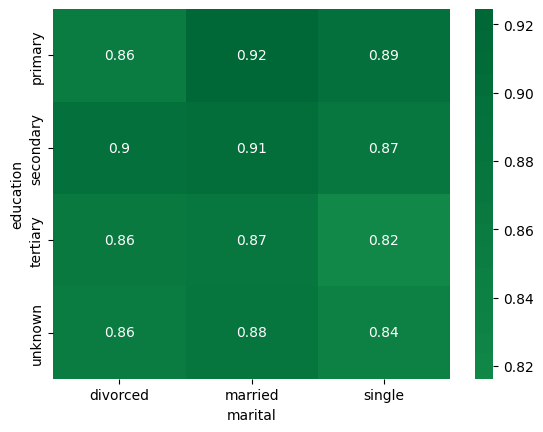

In [44]:
#Create a heatmap of education vs. marital status vs. response rate
sns.heatmap(result, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

Married people with primary education are less likely to respond positively for the survey and sigles's with tertiary education are most likely to responde positively to the survey.

#### Question 11: Similarly, plot the graphs for Job vs. Marital vs. Response, Education vs. poutcome vs. response. Comment your observations.